### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('data\\Cleaned_dataset.csv')

In [3]:
df

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...,...
452083,2023-03-06,Monday,Vistara,UK-926,Business,Ahmedabad,6 AM - 12 PM,1-stop,After 6 PM,Chennai,13.0833,50,65028
452084,2023-03-06,Monday,Vistara,UK-918,Business,Ahmedabad,Before 6 AM,1-stop,12 PM - 6 PM,Chennai,11.2500,50,69254
452085,2023-03-06,Monday,Vistara,UK-918,Business,Ahmedabad,Before 6 AM,1-stop,12 PM - 6 PM,Chennai,11.2500,50,69254
452086,2023-03-06,Monday,Vistara,UK-946,Business,Ahmedabad,6 AM - 12 PM,1-stop,After 6 PM,Chennai,11.1667,50,72980


### Check for missing values

In [4]:
df.isnull().any()

Date_of_journey      False
Journey_day          False
Airline              False
Flight_code          False
Class                False
Source               False
Departure            False
Total_stops          False
Arrival              False
Destination          False
Duration_in_hours    False
Days_left            False
Fare                 False
dtype: bool

In [5]:
df.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955


Which Airlines are in this dataset?

In [6]:
df['Airline'].drop_duplicates()

0            SpiceJet
1              Indigo
2            GO FIRST
4           Air India
10            AirAsia
31            Vistara
72           AkasaAir
73781     AllianceAir
154439        StarAir
Name: Airline, dtype: object

How many unique flights are in this dataset?

In [7]:
df['Flight_code'].drop_duplicates().count()

1405

What are the source and destination airports?

In [8]:
df['Source'].drop_duplicates()

0             Delhi
83153        Mumbai
163876    Bangalore
237251    Hyderabad
293908      Kolkata
349468      Chennai
405982    Ahmedabad
Name: Source, dtype: object

In [9]:
df['Destination'].drop_duplicates()

0           Mumbai
19113    Bangalore
36749    Hyderabad
50195      Kolkata
60008      Chennai
73778    Ahmedabad
83153        Delhi
Name: Destination, dtype: object

Which Airline is the most popular for domestic flights in india?

In [10]:
df.drop_duplicates(subset=['Flight_code','Date_of_journey'])[['Airline','Flight_code']].groupby(['Airline']).count()

,Flight_code
Airline,
Air India,7580
AirAsia,4538
AkasaAir,2230
AllianceAir,393
GO FIRST,4195
Indigo,28519
SpiceJet,3247
StarAir,62
Vistara,7728


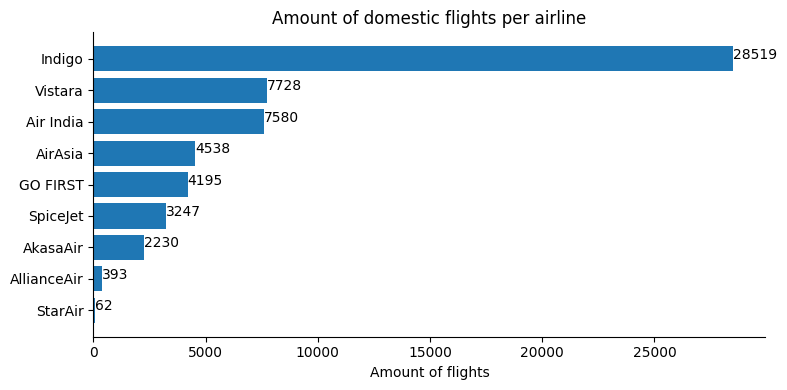

In [11]:
#my_autopct = lambda x: (f'{x:.2f} %') if x > 5.0 else ''
data = df.drop_duplicates(subset=['Flight_code','Date_of_journey'])[['Airline','Flight_code']].groupby(['Airline']).count().sort_values(by='Flight_code')

fig, ax = plt.subplots(figsize=(8,4))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.barh(y=data.index, width=data['Flight_code'])
plt.title('Amount of domestic flights per airline')
for index, value in enumerate(data['Flight_code']):
    plt.text(value, index, str(value))
plt.xlabel('Amount of flights')
plt.tight_layout()
plt.show()

What is the most frequent route?

Amount of flights on top 10 routes: 40378
Amount of flights on other routes: 18114


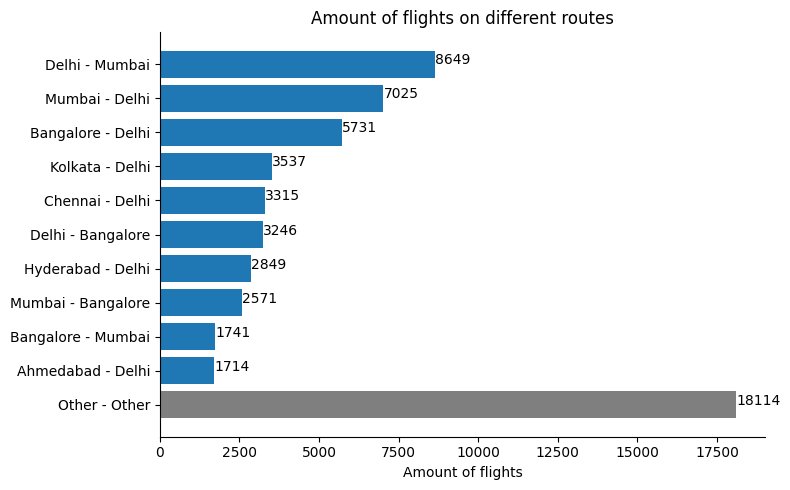

In [12]:
df_routes = df[['Flight_code','Source','Destination','Date_of_journey']].drop_duplicates(subset=['Flight_code','Date_of_journey']).groupby(['Source','Destination']).count()
df_most_frequent_routes = df_routes.nlargest(10,'Flight_code')

amount_for_other_routes = df_routes.sum() - df_most_frequent_routes.sum()

print(f'Amount of flights on top 10 routes: {df_most_frequent_routes["Flight_code"].sum()}')
print(f'Amount of flights on other routes: {amount_for_other_routes["Flight_code"]}')

df_most_frequent_routes.sort_values(by='Flight_code', inplace=True)
df_most_frequent_routes = pd.concat([pd.DataFrame(amount_for_other_routes['Flight_code'], index=pd.MultiIndex.from_tuples([("Other","Other")]), columns=['Flight_code', 'Date_of_journey']), df_most_frequent_routes])
df_most_frequent_routes
labels = []
for source, dest in df_most_frequent_routes.index:
    if source == 'other' and dest == 'other':
        labels.append('other')
    labels.append(f'{source} - {dest}')

fig, ax = plt.subplots(figsize=(8,5))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.barh(y=labels, width=df_most_frequent_routes['Flight_code'], color=['tab:gray']+['tab:blue' for i in range(len(labels)-1)])
plt.title('Amount of flights on different routes')
for index, value in enumerate(df_most_frequent_routes['Flight_code']):
    plt.text(value, index, str(int(value)))
plt.xlabel('Amount of flights')
plt.tight_layout()
plt.show()

How many flights are operated with different classes?

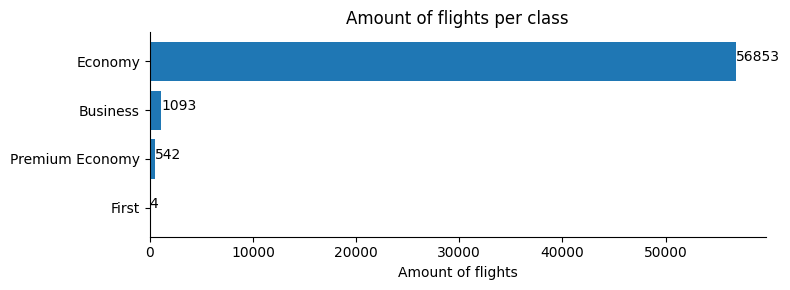

In [13]:
data = df.drop_duplicates(subset=['Flight_code','Date_of_journey'])[['Airline','Class']].groupby(['Class']).count().sort_values(by='Airline')

fig, ax = plt.subplots(figsize=(8,3))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.barh(y=data.index, width=data['Airline'])
plt.title('Amount of flights per class')
for index, value in enumerate(data['Airline']):
    plt.text(value, index, str(value))
plt.xlabel('Amount of flights')
plt.tight_layout()
plt.show()

How does the fare for economy tickets develop with fewer days left?

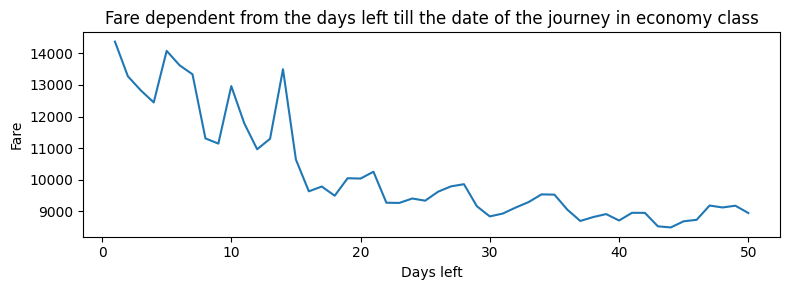

In [14]:
data = df[df['Class']=='Economy']
data = data[['Days_left','Fare']].groupby(['Days_left']).mean()

fig, ax = plt.subplots(figsize=(8,3))

ax.plot(data.index, data['Fare'])
plt.title('Fare dependent from the days left till the date of the journey in economy class')
plt.xlabel('Days left')
plt.ylabel('Fare')
plt.tight_layout()
plt.show()

What does the distribution of the fare separated by classes look like?

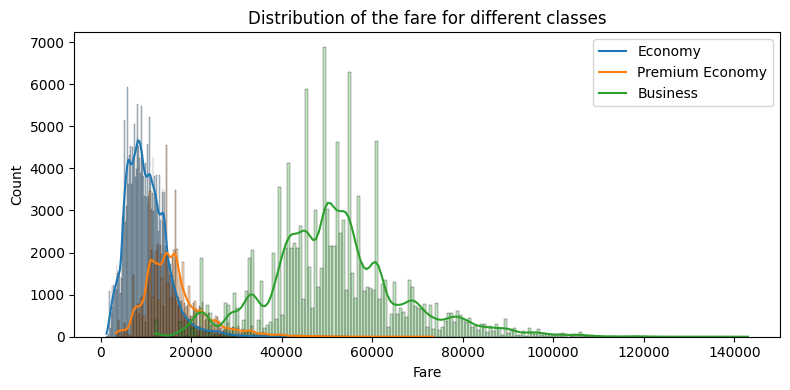

In [15]:
classes = ['Economy','Premium Economy','Business']

fig, ax = plt.subplots(figsize=(8,4))

for class_ in classes:
    ax = sns.histplot(df[df['Class']==class_]['Fare'], kde=True, alpha=0.3, legend=True)

plt.title('Distribution of the fare for different classes')
ax.legend(classes)
plt.tight_layout()
plt.show()

How many flights are non-stop?

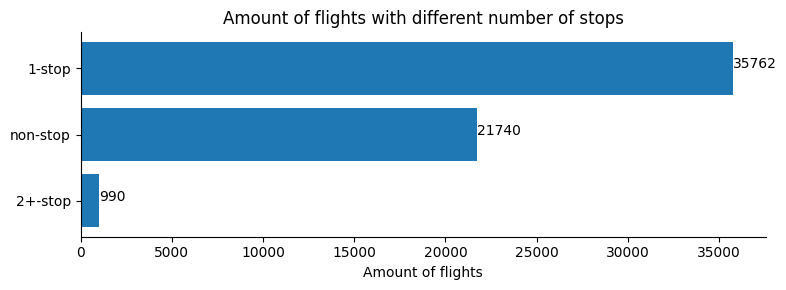

In [16]:
data = df.drop_duplicates(subset=['Flight_code','Date_of_journey']).groupby(['Total_stops']).count().sort_values(by='Flight_code')

fig, ax = plt.subplots(figsize=(8,3))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.barh(y=data.index, width=data['Flight_code'])
plt.title('Amount of flights with different number of stops')
for index, value in enumerate(data['Flight_code']):
    plt.text(value, index, str(value))
plt.xlabel('Amount of flights')
plt.tight_layout()
plt.show()

How does the fare vary with the airline for economy class?

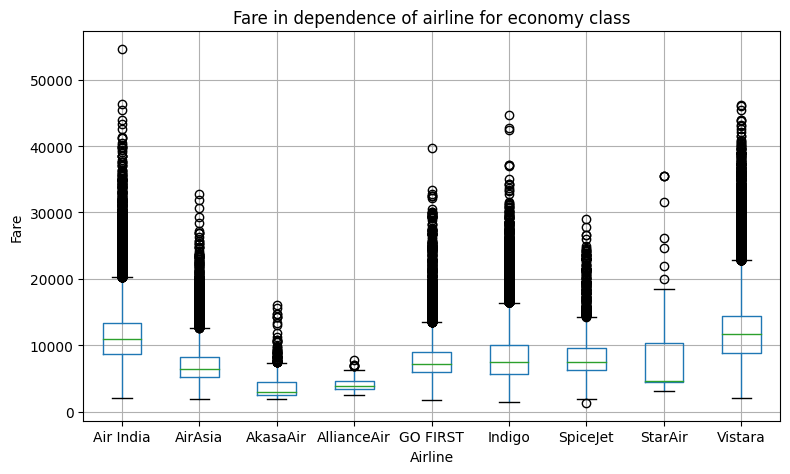

In [17]:
data = df[df['Class']=='Economy'][['Fare','Airline']]

fig, ax = plt.subplots(figsize=(8,5))

data.boxplot(column='Fare', by='Airline', ax=ax)
fig = ax.get_figure()
fig.suptitle('')
plt.title('Fare in dependence of airline for economy class')
plt.ylabel('Fare')
plt.tight_layout()
plt.show()

How does the fare vary with different airlines in economy class and 50 days left?

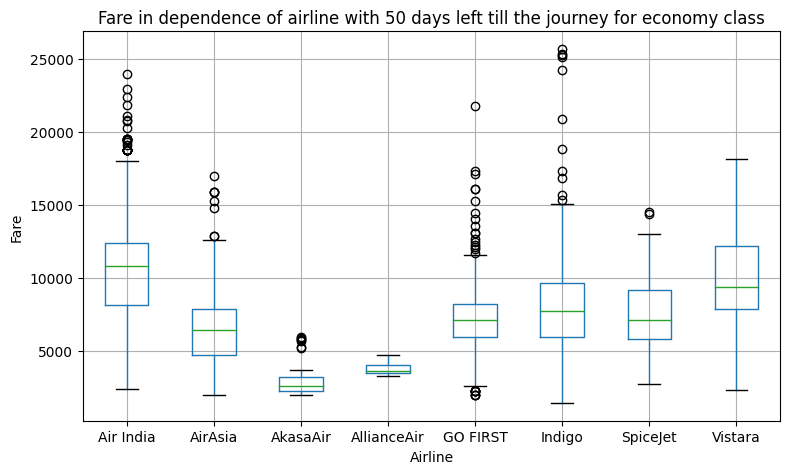

In [18]:
data = df[df['Class']=='Economy']
data = data[data['Days_left']==50][['Fare','Airline']]

fig, ax = plt.subplots(figsize=(8,5))

data.boxplot(column='Fare', by='Airline', ax=ax)
fig = ax.get_figure()
fig.suptitle('')
plt.title('Fare in dependence of airline with 50 days left till the journey for economy class')
plt.ylabel('Fare')
plt.tight_layout()
plt.show()

Process the data for model training and train model

In [19]:
# drop everything except economy class because of the unequal distribution
data = df[df['Class']=='Economy']
# drop flights with 2 or more stops because there are too few of them
data = data[data['Total_stops'].isin(['non-stop','1-stop'])]
# drop Flight_code
data = data.drop('Flight_code', axis=1)

In [20]:
X = df.drop('Fare',axis=1)
y = df['Fare']

In [21]:
labelencoder = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = labelencoder.fit_transform(X[col])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.fit_transform(X_test))

In [24]:
models = [KNeighborsRegressor(), LinearRegression(), RandomForestRegressor(), GradientBoostingRegressor()]
names = ["KNeighborsRegressor", "LinearRegression", "RandomForestRegressor", "GradientBoostingRegressor"]

results = {
    "Name":[],
    "MAE":[],
    "MSE":[],
    "R2-Score":[],
}

for idx, model in enumerate(models):
    m = model
    print(names[idx])
    m.fit(X_train, y_train)
    preds = m.predict(X_test)
    results["Name"].append(names[idx])
    results["MAE"].append(mean_absolute_error(y_test, preds))
    results["MSE"].append(mean_squared_error(y_test, preds))
    results["R2-Score"].append(r2_score(y_test, preds))

pd.DataFrame(results)

KNeighborsRegressor
LinearRegression
RandomForestRegressor
GradientBoostingRegressor


,Name,MAE,MSE,R2-Score
0,KNeighborsRegressor,3257.243721,3.321552e+07,0.919580
1,LinearRegression,12387.283630,2.260661e+08,0.452656
2,RandomForestRegressor,1766.348419,1.383291e+07,0.966508
3,GradientBoostingRegressor,3950.573957,4.119620e+07,0.900257
